In [76]:
from IPython.core.display import HTML
HTML("<style>.container { width:90% !important; }</style>")

In [267]:
%matplotlib inline

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [218]:
import lnPi
reload(lnPi)

<module 'lnPi' from '/Users/wpk/Documents/python/lnPi/__init__.py'>

In [219]:
lnpi_ref = lnPi.lnPi_phases.from_file('./nahs_asym_mix.07_07_07.r1.lnpi_o.dat',mu=[0.5,0.5],fill_value=np.nan,ZeroMax=True,num_phases_max=2,beta=1.0,
                                     build_kwargs=dict(num_phases_max=5),ftag_phases=lnPi.tag_phases_binary) 

In [220]:
def get_spin_bin(ref,mu_in,x,spin_kwargs=None,bin_kwargs=None):
    
    if spin_kwargs is None: spin_kwargs={}
    if bin_kwargs is None: bin_kwargs = {}
    
    #initial estimate
    C = lnPi.lnPi_collection.from_mu(ref,mu_in,x)
    
    C.get_spinodals(**spin_kwargs)
    C.get_binodals(**bin_kwargs)
    
    return C
            

In [221]:
import tqdm

In [240]:
L=[]
for mu2 in tqdm.tqdm(np.arange(-4,4,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10,10,2),spin_kwargs=dict(ntry=40,nmax=40))
    except:
        print 'error at mu2',mu2
        break
    L.append(C)

100%|██████████| 40/40 [00:55<00:00,  0.69it/s]


In [222]:
L2=[]
for mu2 in tqdm.tqdm(np.arange(-5,-4,0.2),leave=True):
    try:
        C = get_spin_bin(lnpi_ref,[None,mu2],np.linspace(-10,10,2),spin_kwargs=dict(nmax=40,ntry=40))
    except:
        print 'error at mu2',mu2
        break
    L2.append(C)

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


In [241]:
LL = L2 + L

In [280]:
!rm bulk.h5

In [286]:
#save L to file
import h5py
F = h5py.File('bulk.h5')

lnpi_ref.to_hdf(F,'lnpi_ref',overwrite=True)
collection_list = []
for i,x in enumerate(LL):
    key = 'collection_%i'%i
    collection_list.append(key)
    x.to_hdf(F,key,ref=None,overwrite=True)
F.create_dataset('collection_list',data=np.array(collection_list))
F.close()

In [288]:
#load file to lst
f = h5py.File('bulk.h5')
ref = lnPi.lnPi_phases.from_hdf(f,'lnpi_ref')

lst = []
for k in f['collection_list']:
    lst.append(lnPi.lnPi_collection.from_hdf(f,k,ref=ref))

f.close()

In [283]:
l = []
for x in lst:
    
    d = {}

    spin = x.spinodals
    if spin[0] is None:
        #no spin
        pass 
    else:
        #spin
        for i,pp in enumerate(spin):
            p = pp.merge_phases(efac=0.8)
            for j in range(2):
                d['mu_spin_%i_comp_%i'%(i,j)] = p.mu[j]
                
            d['omega_spin_%i'%(i)] = p.Omegas_phaseIDs()[i]
                
            d['molfrac_spin_%i_comp_0'%i] = p.molfracs_phaseIDs[i,0]
            
        
    bino = x.binodals[0]
    if bino is None:
        pass
    else:
        #no bin
        p = bino.merge_phases(efac=0.8)

        for i in range(2):
            for j in range(2):
                d['mu_bin_%i_comp_%i'%(i,j)] = p.mu[j]

            d['omega_bin_%i'%(i)] = p.Omegas_phaseIDs()[i]
            d['molfrac_bin_%i_comp_0'%i] = p.molfracs_phaseIDs[i,0]
    l.append(d)
    
df = pd.DataFrame(l)

In [284]:
df.to_hdf('bulk.h5','df')

In [285]:
!ls -hl bulk.h5

-rw-r--r--  1 wpk  wpk    14M Dec 30 21:34 bulk.h5


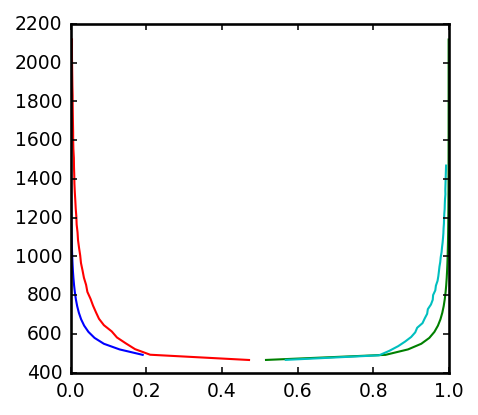

In [289]:
a=df
plt.plot(a.molfrac_bin_0_comp_0,-a.omega_bin_0)
plt.plot(a.molfrac_bin_1_comp_0,-a.omega_bin_1)

plt.plot(a.molfrac_spin_0_comp_0,-a.omega_spin_0)
plt.plot(a.molfrac_spin_1_comp_0,-a.omega_spin_1)


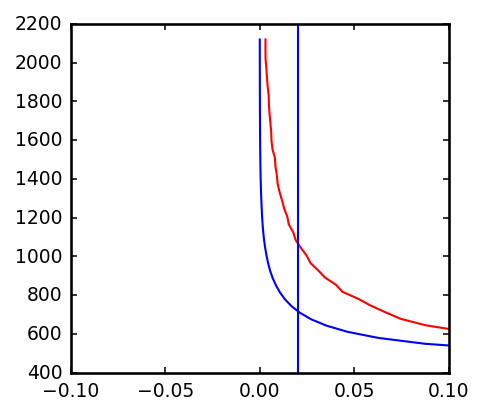

In [26]:
fig,ax=plt.subplots()
plt.plot(df.molfrac_bin_0_comp_0,-df.omega_bin_0)
plt.plot(df.molfrac_bin_1_comp_0,-df.omega_bin_1)

plt.plot(df.molfrac_spin_0_comp_0,-df.omega_spin_0)
plt.plot(df.molfrac_spin_1_comp_0,-df.omega_spin_1)

ax.set_xlim(-0.1,0.1)

ax.axvline(x=0.02)


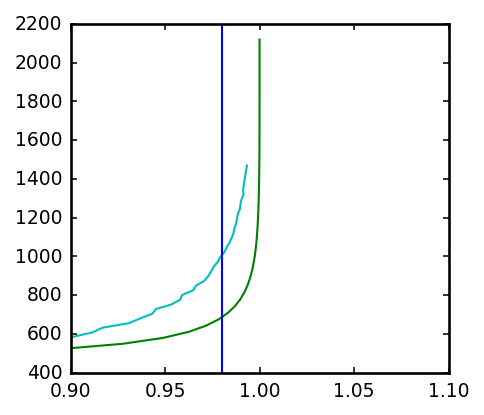

In [27]:
fig,ax=plt.subplots()
plt.plot(df.molfrac_bin_0_comp_0,-df.omega_bin_0)
plt.plot(df.molfrac_bin_1_comp_0,-df.omega_bin_1)

plt.plot(df.molfrac_spin_0_comp_0,-df.omega_spin_0)
plt.plot(df.molfrac_spin_1_comp_0,-df.omega_spin_1)

ax.set_xlim(.9,1.1)

ax.axvline(x=0.98)


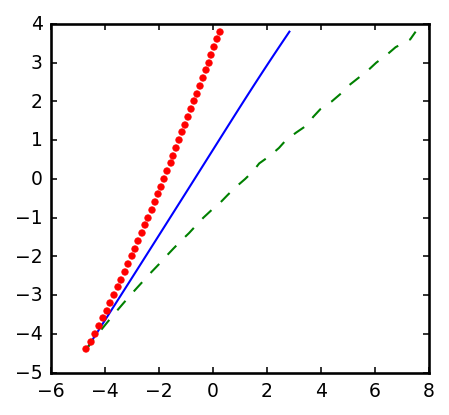

In [28]:

plt.plot(df.mu_bin_0_comp_0,df.mu_bin_0_comp_1)
plt.plot(df.mu_spin_0_comp_0,df.mu_spin_0_comp_1,'--')
plt.plot(df.mu_spin_1_comp_0,df.mu_spin_1_comp_1,'.')

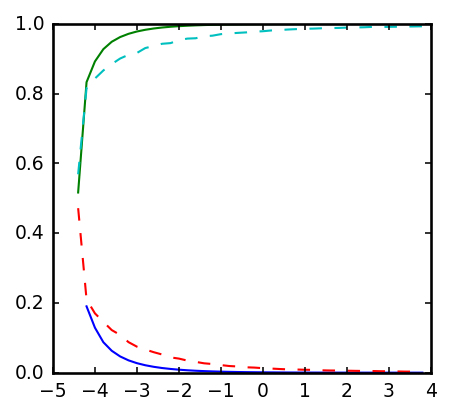

In [29]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

(-0.05, 0.1)

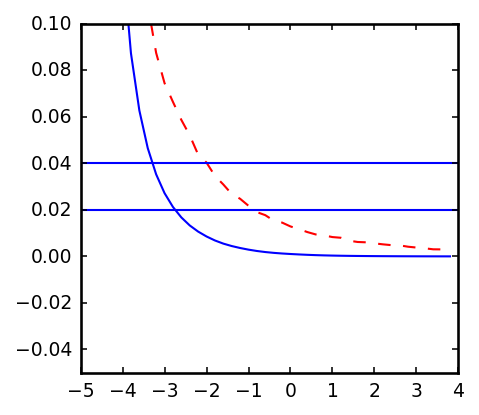

In [30]:
plt.plot(df.mu_bin_0_comp_1,df.molfrac_bin_0_comp_0)
plt.plot(df.mu_bin_1_comp_1,df.molfrac_bin_1_comp_0)

plt.plot(df.mu_spin_0_comp_1,df.molfrac_spin_0_comp_0,'--')
plt.plot(df.mu_spin_1_comp_1,df.molfrac_spin_1_comp_0,'--')

ax = plt.gca()
ax.axhline(y=0.02)
ax.axhline(y=0.04)
ax.set_ylim(-.05,.1)